<h1>Probabilistic approaches and Bayesian classification</h1>

In this notebook you will learn about:
- **Bayes’ Theorem** – theory and practical example  
- **Naive Bayes Classifier** – a simple yet powerful probabilistic model for classification as form of machine learning

## Bayes theorem

$$
P(A \mid B) = \frac{P(B \mid A) \, P(A)}{P(B)}
$$

- P(A): *Probability* of event (A), regardless of (B)
- P(B | A): *Probability* of observing (B) given that (A) is true
- P(B): *Probability* of event (B), regardless of (A)
- P(A | B): *Probability* of observing (A) given that (B) is true

## Bayes theorem example: Diagnostic Test for a Disease
- 1% of the total population has the disease
- 95% of infected individuals have a positive test - sensitivity
- 10% of healthy individuals have a positive test - false positive

In [9]:
# Set values from input
P_population_infected = 0.01
P_positive_given_infected = 0.95
P_positive_given_healthy = 0.10

# Calculation of complementary probabilities
P_population_healthy = 1 - P_population_infected
P_negative_given_infected = 1 - P_positive_given_infected
P_negative_given_healthy = 1 - P_positive_given_healthy

In [10]:
# Display input values in table

import pandas as pd

data = {
    "Event": [
        "Infected population",
        "Healthy population",
        "P(Positive | Infected)",
        "P(Negative | Infected)",
        "P(Positive | Healthy)",
        "P(Negative | Healthy)"
    ],
    "Probability": [
        P_population_infected,
        P_population_healthy,
        P_positive_given_infected,
        P_negative_given_infected,
        P_positive_given_healthy,
        P_negative_given_healthy
    ]
}

df = pd.DataFrame(data)

df["Probability"] = df["Probability"].apply(lambda x: f"{x:.0%}")

styled_df = (df.style
    .hide(axis='index')
    .set_properties(**{'text-align': 'left'})
    .set_table_styles([{
        'selector': 'th',
        'props': [('text-align', 'left')]
    }])
)

styled_df

Event,Probability
Infected population,1%
Healthy population,99%
P(Positive | Infected),95%
P(Negative | Infected),5%
P(Positive | Healthy),10%
P(Negative | Healthy),90%


If test is positive what is the probability of individual actually being infected?

$$
P(Infected \mid Positive) = \frac{P(Positive \mid Infected) \, P(Infected)}{P(Positive)}
$$

In [11]:
# Calculate all positive tests
P_positive = (P_positive_given_infected * P_population_infected + P_positive_given_healthy * P_population_healthy)
print(f"Probability of positive test: {P_positive:.2%}") 

# Calculate probability of infected after positive test
P_infected_given_positive = (P_positive_given_infected * P_population_infected) / P_positive
print(f"Probability of infected individual after test was positive: {P_infected_given_positive:.2%}") 

Probability of positive test: 10.85%
Probability of infected individual after test was positive: 8.76%


<h2>Naive Bayes Classifier</h2>

- multiple classes ( C_1, C_2, ..., C_k )
- x - feature(attribute) vector of object

$$
P(C_i \mid x) = \frac{P(x \mid C_i) \, P(C_i)}{P(x)}
$$

- the goal of a classifier is to select the class that has the **highest probability**

$$
\hat{C} = \arg\max_i \, P(C_i \mid x)
$$


- however in practice, it is often difficult to compute P(x | C_i ), because \(x\) may have many features

- to simplify, we make a **“naive” assumption**: **All features are conditionally independent**

- although this assumption is often **not completely true** in the real world, it **works very well**

- after assumption the resulting formula becomes:

$$
\hat{C} = \arg\max_i \, P(C_i) \prod_{j=1}^{n} P(x_j \mid C_i)
$$

## Naive Bayes Example: Iris Flower Classification

- we will apply a Naive Bayes classifier to classify Iris flowers into species based on their features.

Algorithm
- learns the typical feature values for each Iris species from the training data
- uses this knowledge to predict the species of new, unseen flowers.

Features:
- sepal length (cm)
- sepal width (cm)

Classes / Species:
- setosa
- versicolor
- virginica

Number of samples: 150
Features: ['sepal length (cm)', 'sepal width (cm)']
Classes: ['setosa' 'versicolor' 'virginica']
Accuracy: 0.80


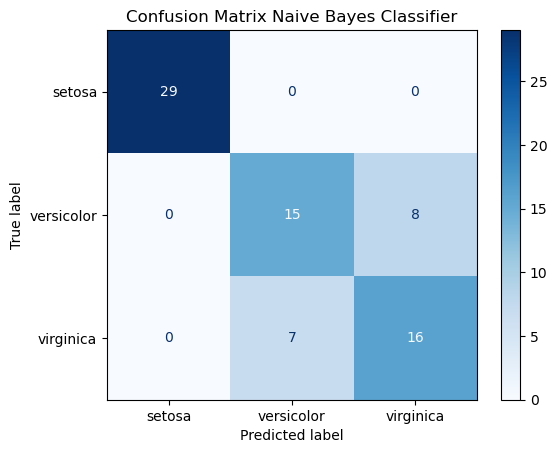

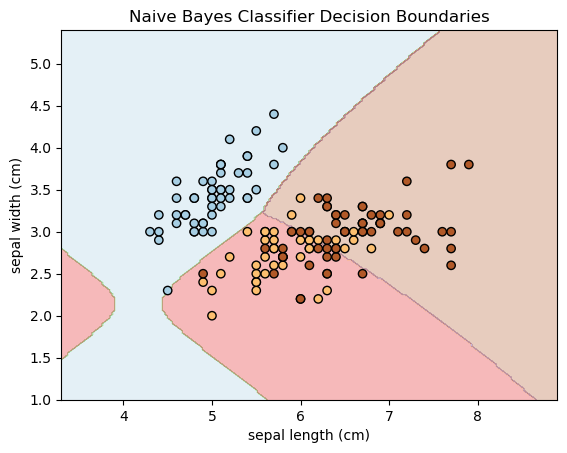

In [13]:
#Import
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

#Load
data = load_iris()
X = data.data[:, :2]
y = data.target
target_names = data.target_names

#Print
print(f"Number of samples: {X.shape[0]}")
print(f"Features: {data.feature_names[:2]}")
print(f"Classes: {target_names}")

#Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

#Train
model = GaussianNB()
model.fit(X_train, y_train)

#Predict
y_pred = model.predict(X_test)

#Evaluate
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix Naive Bayes Classifier")
plt.show()

#Decision Boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title("Naive Bayes Classifier Decision Boundaries")
plt.show()
